In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from src.utils import load_json

In [10]:
# Load toc

gs_name = "sprhea_sp_folded_pt_two_channel_gs_0"
gs_path = f"/projects/p30041/spn1560/hiec/artifacts/model_evals/gnn/{gs_name}"
toc_path = f"{gs_path}/hp_toc.csv"
hp_toc = pd.read_csv(toc_path, sep='\t')
hp_toc.drop(columns=['Unnamed: 0'], inplace=True)
hp_split_dirs = os.listdir(gs_path)
hp_split_dirs.remove('hp_toc.csv')
hp_toc.head()

,n_epochs,pred_head,agg,d_prot,d_h_mpnn,neg_multiple,model
0,25,binary,last,1280,300,1,mpnn_dim_red
1,25,binary,last,1280,300,2,mpnn_dim_red
2,25,binary,last,1280,50,1,mpnn_dim_red
3,25,binary,last,1280,50,2,mpnn_dim_red
4,25,binary,last,1280,20,1,mpnn_dim_red


# Test scores

In [29]:
# Pull scores
tmp_scores = defaultdict(lambda : defaultdict(list))
for hsd in hp_split_dirs:
    hidx = int(hsd.split('_')[0])
    scores = load_json(f"{gs_path}/{hsd}/version_0/test_scores.json")

    for name, val in scores.items():
        tmp_scores[hidx][name].append(val)


# Get new column names
cols = set()
for elt in tmp_scores.values():
    for name in elt.keys():
        cols.add(f"{name}_mean")
        cols.add(f"{name}_std")

# Add new columns
for new in cols:
    hp_toc[new] = pd.Series(dtype='float')

# Fill df w/ scores
for hidx, scores in tmp_scores.items():
    for name, vals in scores.items():
        vals = np.array(vals)
        mean, std = vals.mean(), vals.std()
        hp_toc.loc[hidx, f"{name}_mean"] = mean
        hp_toc.loc[hidx, f"{name}_std"] = std

In [39]:
hp_toc.head()

,n_epochs,pred_head,agg,d_prot,d_h_mpnn,neg_multiple,model,recall_mean,f1_std,accuracy_mean,accuracy_std,precision_mean,precision_std,f1_mean,recall_std
0,25,binary,last,1280,300,1,mpnn_dim_red,0.983285,0.000802,0.967383,0.000796,0.952980,0.001292,0.967893,0.001949
1,25,binary,last,1280,300,2,mpnn_dim_red,0.973202,0.001313,0.972386,0.000978,0.945584,0.004752,0.959180,0.002826
2,25,binary,last,1280,50,1,mpnn_dim_red,0.982354,0.000975,0.965410,0.000912,0.950163,0.001429,0.965985,0.003371
3,25,binary,last,1280,50,2,mpnn_dim_red,0.974846,0.000875,0.969792,0.000645,0.937074,0.002363,0.955584,0.000737
4,25,binary,last,1280,20,1,mpnn_dim_red,0.980819,0.000456,0.959821,0.000457,0.941291,0.001292,0.960647,0.001583


In [33]:
print(hp_toc.columns)

Index(['n_epochs', 'pred_head', 'agg', 'd_prot', 'd_h_mpnn', 'neg_multiple',
       'model', 'recall_mean', 'f1_std', 'accuracy_mean', 'accuracy_std',
       'precision_mean', 'precision_std', 'f1_mean', 'recall_std'],
      dtype='object')


In [37]:
display_res = hp_toc[['agg', 'pred_head', 'd_h_mpnn', 'neg_multiple', 'f1_mean', 'precision_mean', 'recall_mean', 'accuracy_mean']]
display_res.sort_values(by=['f1_mean'], ascending=False)

,agg,pred_head,d_h_mpnn,neg_multiple,f1_mean,precision_mean,recall_mean,accuracy_mean
6,mean,binary,300,1,0.971502,0.957008,0.986445,0.971064
8,mean,binary,50,1,0.969427,0.952973,0.986464,0.968890
0,last,binary,300,1,0.967893,0.952980,0.983285,0.967383
2,last,binary,50,1,0.965985,0.950163,0.982354,0.965410
7,mean,binary,300,2,0.965253,0.951034,0.979906,0.976484
18,mean,dot_sig,300,1,0.964045,0.959288,0.968854,0.963867
10,mean,binary,20,1,0.963924,0.945330,0.983267,0.963200
20,mean,dot_sig,50,1,0.963683,0.956062,0.971430,0.963392
12,last,dot_sig,300,1,0.961843,0.958244,0.965475,0.961702
14,last,dot_sig,50,1,0.961563,0.956662,0.966516,0.961364


In [26]:
tmp_scores

defaultdict(<function __main__.<lambda>()>,
            {6: defaultdict(list,
                         {'f1': [0.9724167654347593,
                           0.9708842656304812,
                           0.9712045423820467],
                          'precision': [0.9562407289680017,
                           0.95630448649798,
                           0.9584800939267798],
                          'recall': [0.98914949583516,
                           0.9859154929577465,
                           0.9842713870773278],
                          'accuracy': [0.9719421306444542,
                           0.970433495917137,
                           0.9708171206225681]}),
             23: defaultdict(list,
                         {'f1': [0.9029612756264236,
                           0.901386748844376,
                           0.9101955465129422],
                          'precision': [0.9397818871503082,
                           0.9402345377701053,
                           

# Loss curves

In [49]:
loss_curves = defaultdict(lambda: defaultdict()) # 'hpidx_sidx': {epochs: [int], losses: [float])
for hsd in hp_split_dirs:
    hidx = int(hsd.split('_')[0])
    lc = pd.read_csv(f"{gs_path}/{hsd}/version_0/metrics.csv", sep=',')
    ep_ave_lc = lc.groupby('epoch').agg('mean').reset_index() # Average over epochs
    loss_curves[hsd]['epochs'] = ep_ave_lc.loc[:, 'epoch'].to_numpy()
    loss_curves[hsd]['losses'] = ep_ave_lc.loc[:, 'train_loss'].to_numpy()



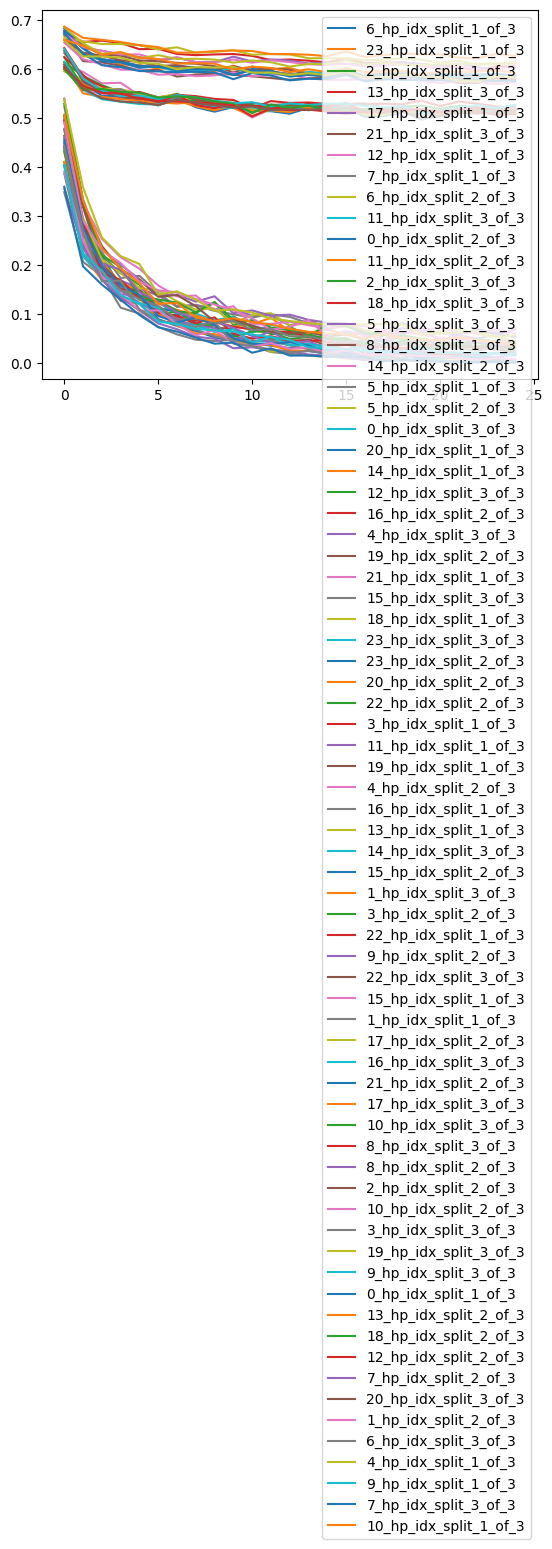

In [50]:
fig, ax = plt.subplots()
for k,v in loss_curves.items():
    ax.plot(v['epochs'], v['losses'], label=k)

ax.legend()
plt.show()

In [57]:
bad_lc = {k:v for k,v in loss_curves.items() if v['losses'][-1] > 0.4}
sorted(bad_lc.keys())

['12_hp_idx_split_1_of_3',
 '12_hp_idx_split_2_of_3',
 '12_hp_idx_split_3_of_3',
 '13_hp_idx_split_1_of_3',
 '13_hp_idx_split_2_of_3',
 '13_hp_idx_split_3_of_3',
 '14_hp_idx_split_1_of_3',
 '14_hp_idx_split_2_of_3',
 '14_hp_idx_split_3_of_3',
 '15_hp_idx_split_1_of_3',
 '15_hp_idx_split_2_of_3',
 '15_hp_idx_split_3_of_3',
 '16_hp_idx_split_1_of_3',
 '16_hp_idx_split_2_of_3',
 '16_hp_idx_split_3_of_3',
 '17_hp_idx_split_1_of_3',
 '17_hp_idx_split_2_of_3',
 '17_hp_idx_split_3_of_3',
 '18_hp_idx_split_1_of_3',
 '18_hp_idx_split_2_of_3',
 '18_hp_idx_split_3_of_3',
 '19_hp_idx_split_1_of_3',
 '19_hp_idx_split_2_of_3',
 '19_hp_idx_split_3_of_3',
 '20_hp_idx_split_1_of_3',
 '20_hp_idx_split_2_of_3',
 '20_hp_idx_split_3_of_3',
 '21_hp_idx_split_1_of_3',
 '21_hp_idx_split_2_of_3',
 '21_hp_idx_split_3_of_3',
 '22_hp_idx_split_1_of_3',
 '22_hp_idx_split_2_of_3',
 '22_hp_idx_split_3_of_3',
 '23_hp_idx_split_1_of_3',
 '23_hp_idx_split_2_of_3',
 '23_hp_idx_split_3_of_3']

In [58]:
hp_toc.loc[12:24]

,n_epochs,pred_head,agg,d_prot,d_h_mpnn,neg_multiple,model,recall_mean,f1_std,accuracy_mean,accuracy_std,precision_mean,precision_std,f1_mean,recall_std
12,25,dot_sig,last,1280,300,1,mpnn_dim_red,0.965475,0.002399,0.961702,0.002353,0.958244,0.001502,0.961843,0.003883
13,25,dot_sig,last,1280,300,2,mpnn_dim_red,0.723450,0.046859,0.895754,0.022816,0.952536,0.001907,0.820185,0.073399
14,25,dot_sig,last,1280,50,1,mpnn_dim_red,0.966516,0.002263,0.961364,0.002289,0.956662,0.002661,0.961563,0.002080
15,25,dot_sig,last,1280,50,2,mpnn_dim_red,0.818642,0.044161,0.924184,0.023473,0.946611,0.001030,0.876203,0.073709
16,25,dot_sig,last,1280,20,1,mpnn_dim_red,0.940868,0.004169,0.942841,0.004017,0.944594,0.002574,0.942717,0.006824
17,25,dot_sig,last,1280,20,2,mpnn_dim_red,0.667731,0.048389,0.874575,0.021377,0.938185,0.003556,0.778115,0.068601
18,25,dot_sig,mean,1280,300,1,mpnn_dim_red,0.968854,0.000536,0.963867,0.000492,0.959288,0.000701,0.964045,0.001787
19,25,dot_sig,mean,1280,300,2,mpnn_dim_red,0.901666,0.001561,0.952675,0.001059,0.953856,0.003851,0.927018,0.002774
20,25,dot_sig,mean,1280,50,1,mpnn_dim_red,0.971430,0.000477,0.963392,0.000446,0.956062,0.000539,0.963683,0.001447
21,25,dot_sig,mean,1280,50,2,mpnn_dim_red,0.930236,0.003321,0.960256,0.002011,0.949516,0.001116,0.939758,0.007396
